# Numpy arrays and pytorch arrays
Numpy is a Python package permitting the processing of large n-dimensional arrays in the most efficient manner. N-dimensional arrays (`ndarrays`) are one of the key building blocks for scientific computing.

As part of the SciPy stack, numpy was created as a merger between `numeric` and `numarray` in 2005 and is one of the pillars that underpins the success of Python in machine learning that we see today.

It implements a fairly standard idea of the *strided array*. Given that computer memory addresses are linear, numpy needs to be able to go from this linear memory layout to any cuboid-type array shape. We will see how this is done.

The other, extremely useful concept that it implements is *broadcasting*, which is an implicit tiling operation to complete lower-dimensional arrays into high-dimensional ones. This operation is essential.

Every numpy array has a data type (`dtype`), which is fixed. Items of this data type are tiled through the allocated memory to make up the array. Examples of `dtype` are `float32`, `float64`, `int32`, `int64`, `bool`, `uint8`.

In [1]:
import numpy as np

## Creating numpy arrays
We will briefly go over ways of creating numpy arrays, in order to get us started.

We can create numpy arrays

### From lists and tuples

If we have a python list or tuple, we can call `np.array` or `np.as_array` on it, and obtain an array with the least general `dtype` that accommodates all the entries

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
np.array([1, 2, 3.0])

array([1., 2., 3.])

In [4]:
np.array([1.5, 2., 'a'])

array(['1.5', '2.0', 'a'], dtype='<U32')

One can also specify the `dtype`

In [5]:
np.array([1, 2, 3], dtype='float32')

array([1., 2., 3.], dtype=float32)

When the `dtype` is the "default dtype for that type of data", then it is not mentioned:

In [6]:
np.array([1, 2, 3], dtype='float64')

array([1., 2., 3.])

Above we chose the default floating-point type `float64`, so it is not written, but represented by the floating point after each number. 

We can make multidimensional arrays from lists by passing lists of lists

In [7]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

But beware of trying to make an array of different-length lists

In [8]:
np.array([[1, 2, 3], [4, 5]])

array([list([1, 2, 3]), list([4, 5])], dtype=object)

This will just turn out to be an array with two "`object`s", because `object` is the least general type here (at the same time it is also the most general type). 

(But learn how to concatenate arrays just below)

### with ranges and grids
Ranges, as they exist in python have a direct counterpart in numpy, `np.arange`.

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

Note that the first value is included and the last value is excluded. The implicit first value is 0.

This is unlike e.g. matlab

We can also specify `dtype`, implicitly:

In [11]:
np.arange(1., 5.5)

array([1., 2., 3., 4., 5.])

or explicitly:

In [12]:
np.arange(2000., 2018., dtype=int)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

We can also specify step sizes other than 1

In [13]:
np.arange(100, 102, 0.05)

array([100.  , 100.05, 100.1 , 100.15, 100.2 , 100.25, 100.3 , 100.35,
       100.4 , 100.45, 100.5 , 100.55, 100.6 , 100.65, 100.7 , 100.75,
       100.8 , 100.85, 100.9 , 100.95, 101.  , 101.05, 101.1 , 101.15,
       101.2 , 101.25, 101.3 , 101.35, 101.4 , 101.45, 101.5 , 101.55,
       101.6 , 101.65, 101.7 , 101.75, 101.8 , 101.85, 101.9 , 101.95])

Grids are like ranges, but can be more than 1D. We can use `np.mgrid` to create exactly the array from above.

In [14]:
np.mgrid[100:102:0.05]  # we will learn more about this : notation later

array([100.  , 100.05, 100.1 , 100.15, 100.2 , 100.25, 100.3 , 100.35,
       100.4 , 100.45, 100.5 , 100.55, 100.6 , 100.65, 100.7 , 100.75,
       100.8 , 100.85, 100.9 , 100.95, 101.  , 101.05, 101.1 , 101.15,
       101.2 , 101.25, 101.3 , 101.35, 101.4 , 101.45, 101.5 , 101.55,
       101.6 , 101.65, 101.7 , 101.75, 101.8 , 101.85, 101.9 , 101.95])

But we can also use it to create arrays of coordinates:

In [15]:
g = np.mgrid[0:4, 0:5]

In [16]:
g

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [17]:
g.shape

(2, 4, 5)

If called with two sets of ranges, then it outputs two 2D grids of shape `(length of first range, length of second range)`. In the first grid, the first variable varies, and in the second grid the second variable varies

In [18]:
g[0] # we will also see this notation for arrays later

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [19]:
g[1]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

### zeros and ones and empty arrays

One can also create arrays that are filled with `zeros`, `ones`, or `empty` ones that remain uninitialized:

In [20]:
np.zeros((5,))

array([0., 0., 0., 0., 0.])

In [21]:
np.zeros((2, 3), dtype='int32')

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [22]:
np.ones((4, 2, 3), dtype='float32')

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [23]:
np.empty((3, 4), dtype='float')

array([[0.0078125, 0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125, 0.0078125]])

In [24]:
np.empty((2, 3), dtype='int')

array([[7863896425564026418, 2478510836883089267, 8391722768137527866],
       [2484135899465670501, 7020674649171501612, 7163376676081132909]])

When initializing `empty`, then the memory allocated for the array is not initialized and retains the values from previous use.

A fun way of investigating uninitialized memory is to plot it as an image:

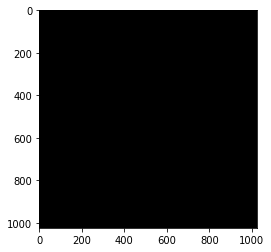

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.empty((1024, 1024), dtype='uint8'), cmap='gray')

Also, always be aware of the data type that you are using. In the case of the above `uint8` it is necessary to keep in mind the range of possible values:

In [26]:
a = np.uint8([200])
b = np.uint8([54])

In [27]:
a, b

(array([200], dtype=uint8), array([54], dtype=uint8))

In [28]:
a + b

array([254], dtype=uint8)

Now let's make b a little larger:

In [29]:
a = np.uint8([200])
b = np.uint8([57])

In [30]:
a, b

(array([200], dtype=uint8), array([57], dtype=uint8))

In [31]:
a + b

array([1], dtype=uint8)

### random values
We need random values regularly. We can obtain them using the `np.random` module.

The function `np.random.randn` outputs standard normal values

In [32]:
np.random.randn(10)

array([-0.30881009,  1.04260449,  1.83921549,  0.12179782,  0.68261597,
       -1.33836399,  1.17401324, -1.23690281,  0.09005832,  0.67961231])

In [33]:
np.random.randn(2, 3)

array([[ 1.14798192,  1.36935819,  0.01558466],
       [ 0.62293277, -0.32190622,  0.27628251]])

Let's check this by displaying a histogram

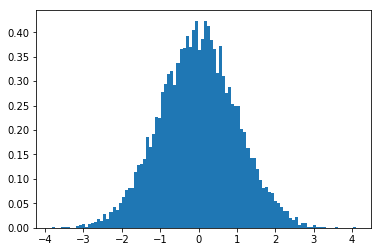

In [34]:
n = np.random.randn(10000)
plt.hist(n, bins=100, density=True)
pass

Numpy arrays have built-in methods for simple summary statistics, such as `mean` and `std`.

In [35]:
n.mean(), n.std()

(-0.011083684071670968, 1.0003091157261974)

They are also accesible as stand-alone functions:

In [36]:
np.mean(n), np.std(n) / np.sqrt(len(n))

(-0.011083684071670968, 0.010003091157261975)

Another type of random variable frequently generated is the standard uniform random variable, which we can be found at `np.random.rand`.

In [37]:
np.random.rand(5)

array([0.92505722, 0.61973802, 0.44824634, 0.48987985, 0.37144965])

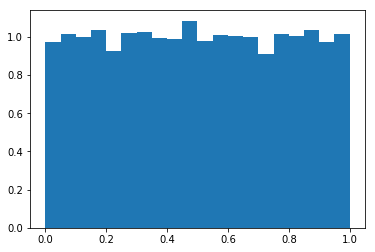

In [38]:
u = np.random.rand(10000)
plt.hist(u, bins=20, density=True)
pass

In order to guarantee exact reproducibility of results in code, we can use random number generators with a specific seed:

In [39]:
rng = np.random.RandomState(42)

In [40]:
rng.randn(3)

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [41]:
rng.rand(2)

array([0.15601864, 0.15599452])

If we recreate another random number generator with the same seed, it will produce the same numbers

In [42]:
rng2 = np.random.RandomState(42)

In [43]:
rng2.randn(3)

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [44]:
rng2.rand(3)

array([0.15601864, 0.15599452, 0.05808361])

Note that above we added one number extra. If we generate one number with `rng`, it will be the same

In [45]:
rng.rand()

0.05808361216819946

### saving and loading from files

Numpy provides easy functionality for loading and saving arrays. Let's take a look:

In [46]:
a = np.arange(10)

In [47]:
np.save("./tmp.npy", a)

In [48]:
!ls *npy

tmp.npy


In [49]:
b = np.load("./tmp.npy")

In [50]:
b == a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Basic array manipulation techniques

Numpy arrays come with a handful of very intuitive ways of changing and combining them.

### Basic pointwise arithmetic

Pointwise arithmetic allows performing anything that one can perform on one number on a full array. Given two arrays of the same shape, one can also perform all sorts of pointwise binary operations such as addition and multiplication.

In [51]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
2 * a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [53]:
a + 2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [54]:
a ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [55]:
a + b

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [56]:
A = np.array([[1, 3], [5, 5]])
B = np.random.rand(2, 2)
A, B

(array([[1, 3],
        [5, 5]]), array([[0.69508819, 0.39564635],
        [0.93568788, 0.68207465]]))

In [57]:
A + B

array([[1.69508819, 3.39564635],
       [5.93568788, 5.68207465]])

## Slicing and Indexing

In this section we look at how we can extract data from arrays, and assign data to specific parts of arrays. 

In [58]:
a = np.arange(100, 112)
b = np.ones((3, 4))
c = np.zeros((3, 4), dtype='float32')
d = np.random.randn(3, 4)
a, b, c, d

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]),
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([[ 0.33361511,  0.16186204,  0.18005445,  0.37495819],
        [-1.23289069, -0.68145152, -2.87500005, -0.78023634],
        [-0.7332663 ,  0.36433204,  0.45225459,  1.18148044]]))

### Indexing
We can access individual elements of an array through *indexing*

In [59]:
a

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111])

In [60]:
a[5]

105

Indexing is done by adding the square brackets `[`, `]` to an array, and specifying an integer index, starting at 0.

In [61]:
d

array([[ 0.33361511,  0.16186204,  0.18005445,  0.37495819],
       [-1.23289069, -0.68145152, -2.87500005, -0.78023634],
       [-0.7332663 ,  0.36433204,  0.45225459,  1.18148044]])

In [62]:
d[1, 0]

-1.2328906889776725

The above line returns the first element of the second row of `d` (remember, indexing starts at 0!).

We can also use indexing to *assign* values to arrays

In [63]:
d[1, 0] = 10

In [64]:
d

array([[ 0.33361511,  0.16186204,  0.18005445,  0.37495819],
       [10.        , -0.68145152, -2.87500005, -0.78023634],
       [-0.7332663 ,  0.36433204,  0.45225459,  1.18148044]])

In [65]:
a[0] = 900

In [66]:
a

array([900, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111])

We can also specify *negative* indices, which give us access to the array from the other side

In [67]:
a[-1] = 1000

In [68]:
a

array([ 900,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
       1000])

In [69]:
a[-2] = 2000

In [70]:
a

array([ 900,  101,  102,  103,  104,  105,  106,  107,  108,  109, 2000,
       1000])

Lastly, if we index a 2D array with only one value, it acts sort of like a list of lists, and hands back a subarray:

In [71]:
d

array([[ 0.33361511,  0.16186204,  0.18005445,  0.37495819],
       [10.        , -0.68145152, -2.87500005, -0.78023634],
       [-0.7332663 ,  0.36433204,  0.45225459,  1.18148044]])

In [72]:
d[2]

array([-0.7332663 ,  0.36433204,  0.45225459,  1.18148044])

This returned the last row (the row with index 2)

In [73]:
b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [74]:
b[1] = 3

In [75]:
b

array([[1., 1., 1., 1.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [76]:
b[0] = [6, 7, 8, 9]

In [77]:
b

array([[6., 7., 8., 9.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

### Slicing

We just saw how indexing can get us individual points of arrays, and, more generally, seeing the array as a "list of lists", indexing can obtain "sets of sublists", where the shape is some subset of the right-hand part of the initial shape.
This means for examples, that indexing can get us rows of a matrix. But it can't get us columns.

In order to get columns, or, more generally regularly spaced subarrays, we need to use **slicing**:

A **slice** is specified by a starting point, and end point and potentially a skip step (which defaults to 1).

Let's take a look at `b` from above

In [78]:
b[2] = [0, 1, 2, 3]
b

array([[6., 7., 8., 9.],
       [3., 3., 3., 3.],
       [0., 1., 2., 3.]])

You can obtain the first column of `b` by putting `:` as a sort of place holder meaning "all the rows"

In [79]:
b[:, 0]

array([6., 3., 0.])

Similarly, the second columns is

In [80]:
b[:, 1]

array([7., 3., 1.])

This behavior is a special case of slicing where we do not specify beginning and endpoint and they are assumed to be extremal.

To specify start and end, you write them around the colon:

In [81]:
b[0:2, 1]

array([7., 3.])

In [82]:
b[1:3, 1]

array([3., 1.])

You can slice in all axes simultaneously

In [83]:
c = b[0:2, 0:2]
c

array([[6., 7.],
       [3., 3.]])

Crucially, note that `c` actually uses the same memory as `b`: **slices never copy**

In [84]:
c[1, 1] = 20

In [85]:
c

array([[ 6.,  7.],
       [ 3., 20.]])

In [86]:
b

array([[ 6.,  7.,  8.,  9.],
       [ 3., 20.,  3.,  3.],
       [ 0.,  1.,  2.,  3.]])

We can also specify how many entries to skip at each step:

In [87]:
b[:, 1:4:2]

array([[ 7.,  9.],
       [20.,  3.],
       [ 1.,  3.]])

The above slice selects every second column starting at the one with index 1 (the second one)

**Exercise:** Find a slice that selects the four corners of array `b`

In [ ]:
# %load solutions/numpy/solution01.txt
# %load solutions/numpy/solution01.txt


Note that you can put the expression `None` at any point in a slice, and it will use the default value for that position:

In [ ]:
b[None:2]

In [ ]:
b[1:None]

The above means "go from the standard beginning row to the one with index 2 exclusive"

In [ ]:
b[:, None:None:2]

The above means "select all columns from the standard beginning to the standard end and take every second one"

This `None` notation is helpful when you don't know how long the array is. The great news is that you can just omit the `None`!

In [ ]:
b[:, ::2]

As with indexing, you can also use negative numbers:

In [ ]:
b[:, :-1]

even negative skip steps:

In [ ]:
b[:, 3:None:-1]

Note that above we needed `None` to specify "go to the beginning", since putting `0` would have led to leaving the first column out.

We can also omit the `None` (and the 3 since it corresponds with the default beginning for a reverse array)

In [ ]:
b[:, ::-1]

### strides and shapes
The reason why you can create all sorts of slices without making copies is the underlying architecture of these arrays. We will very briefly touch on the fundamentals.

#### Memory addresses are linear
This means that every single location in memory can be defined by (mostly contiguous) numbers. As a matter of fact, our array from above starts here:

In [ ]:
b.ctypes.data

In [ ]:
b[:, 1:].ctypes.data

In [ ]:
b.dtype.itemsize

In [ ]:
b[:, ::-1].ctypes.data

#### So how do we make n-dimensional arrays out of that?
Answer: we invent them ourselves with three ingredients

**Shape** and **strides** and an **initial memory location** are what essentially defines which data from memory belong to an array, and how that array is presented to the user.

Let's take a look at shapes:

In [ ]:
a

In [ ]:
a.shape

The shape of `a` is defined by one number. That is why we call it a `1D` array.

In [ ]:
b

In [ ]:
b.shape

The shape of `b` has two entries - it is a `2D` array.

In [ ]:
a.size

In [ ]:
b.size

The attribute `size` indicates the total number of elements in an array. Both `a` and `b` have 12 elements.

#### Strides
Now let's take a look at strides. Strides are what tells us how much we need to jump in memory in order to move along a specific axis of an array.

In [ ]:
a.strides

The stride of `a` is 8. This is because the size of one entry of `a` is 8 bytes long.

In [ ]:
a.dtype.itemsize

In [ ]:
a.astype('float32').strides

In [ ]:
b.strides

For `b` the situation is more complex. We see `32, 8`. This means that in order to jump to the next row of `b`, we need to skip `32` bytes in memory.

Let's check our subslices of `b`:

In [ ]:
b[:, 0::2].strides

The above now needs 16 bytes to step along the row.

In [ ]:
b[::2, ::3].strides

If we skip a row, like above, the row stride doubles. If our step is 3 in the other direction, then our step there triples

In [ ]:
b[::-1, ::-1].strides

If we flip an array around, this means that our strides go backwards in memory.

**Exercise:** Play around with `numpy.lib.stride_tricks.as_strided` if you feel like decoupling shape and stride.

#### reshaping and setting shape

Given that shape seems to be something arbitrary that we impose upon a linear chunk of memory, we can also modify it provided that the total amount of elements in an array stays the same.

Let's take a look

In [ ]:
a.shape, a

In [ ]:
a.reshape(3, 4)

We observe that this reshaping action basically just took sets of 4 elements from `a` and wrote them into the rows of `b`

Conversely, we can turn a 2D array into a 1D array:

In [ ]:
b

In [ ]:
b.reshape(12)

This can also be achieved by the `ravel` method:

In [ ]:
b.ravel()

In [ ]:
b.reshape(12, 1)

In [ ]:
b.reshape(4, 3)

When we don't know the length of one of our reshape axes, we can replace it with `-1`:

In [ ]:
b.reshape(4, -1)

In [ ]:
b.reshape(-1, 3)

In [ ]:
b.reshape(-1)

In [ ]:
b.reshape(1, -1)

In [ ]:
b.reshape(-1, 1)

Notice that you can assess the logic of where each element gets placed by first imagining an array fully raveled into one line, and then rearranging it back into the desired shape.

In [ ]:
b.reshape(2, 3, 2)

For all numpy array reshape operations, we imagine the array to be **C-ordered**. This means that in memory, the last axis moves in the smallest steps, the second to last in the next-smallest, and the first in the largest steps.

**Important:** Numpy reshaping operations **do not make copies** if the underlying strides make the reshape possible by simply changing strides. This is only the case when the array is **C-contiguous**. In all other cases, **numpy makes a copy**.

In [ ]:
b

In [ ]:
b_reshaped = b.reshape(-1)

In [ ]:
b_sliced_reshaped = b[:, 1:].reshape(-1)

In [ ]:
b_reshaped, b_sliced_reshaped

In [ ]:
b_reshaped[-1] = 100

In [ ]:
b

In [ ]:
b_sliced_reshaped[-1] = 200

In [ ]:
b_sliced_reshaped, b

In order to make sure that no copy is made, we can assign a `shape`. If it is not compatible with the array reshape without copy, then we will get an error.

In [ ]:
b_reshaped.shape = 2, 6

In [ ]:
b_reshaped

In [ ]:
b_sliced = b[:, 1:]

In [ ]:
b_sliced.shape

In [ ]:
b_sliced.shape = (9,)

Reshaping can be used to do some interesting sampling of images

In [ ]:
from skimage.data import camera

In [ ]:
c = camera()

In [ ]:
plt.imshow(c, cmap='gray')

In [ ]:
c.shape

For example, we can use `reshape` to get every second pixel of each image row

In [ ]:
c2 = c.reshape(512, 256, 2)

In [ ]:
plt.imshow(c2[:, :, 0], cmap='gray')
plt.figure()
plt.imshow(c2[:, :, 1], cmap='gray')

These two images correspond to the slices `c[:, ::2]` and `c[:, 1::2]`:

In [ ]:
(c2[:, :, 0] == c[:, ::2]).all()

In [ ]:
(c2[:, :, 1] == c[:, 1::2]).all()

But we can also use `reshape` to cut the image in half:

In [ ]:
c3 = c2.reshape(512, 2, 256)

In [ ]:
plt.imshow(c3[:, 0, :], cmap='gray')
plt.figure()
plt.imshow(c3[:, 1, :], cmap='gray')

**Exercise:** For a matrix `A`, through a reshaping and slicing operation, extract its diagonal

In [ ]:
A = np.arange(12).reshape(3, 4)
A

In [ ]:
diagA = A.ravel()[::A.shape[1] + 1]
diagA

**Exercise:** For a stack of matrices `B` of 3 dimensions, where the first axis counts the matrices, extract all their diagonals

In [ ]:
B = np.arange(24).reshape(2, 3, 4)

In [ ]:
B

In [ ]:
diagB = B.reshape(B.shape[0], -1)[:, ::B.shape[2] + 1]

In [ ]:
diagB

#### transpose
Transposing (i.e. permuting axes) is really important in numpy arrays. It allows us to arbitrarily rearrange the order of axes.

In 2D matrices, only one rearrangement is possible

In [ ]:
A = np.arange(30).reshape(5, 6)

In [ ]:
A

In [ ]:
A.T

In [ ]:
A.transpose()

It is important to note that `transpose` does not create a copy but simply modifies shape and strides:

In [ ]:
A.shape, A.strides

In [ ]:
A.T.shape, A.T.strides

But for higher dimensions, you can have other types of reorderings:

In [ ]:
B = A.reshape(2, 3, 5)

In [ ]:
B

In [ ]:
B.transpose(0, 2, 1), B.transpose(0, 2, 1).shape

The arguments to `transpose` give you the new order of the axes. If you don't specify and order, then it simply reverses the axis order:

In [ ]:
B.transpose(), B.transpose().shape

That's also what `B.T` does:

In [ ]:
B.T.shape

**Exercise:** Fun with images.

**1\.** Cut the camera-man image into 16 patches of shape `(128, 128)` using `reshape`. Store the output in `c4`.

In [ ]:
c4 = c.reshape(4, 128, 4, 128)

**2\.** Look at the output of `c4`. Identify which axes index the patches, and which axes index the pixels. Use `transpose` to bring the indexing axes to the front. Call the output `c4_transposed`

In [ ]:
c4_transposed = c4.transpose(0, 2, 1, 3)
c4_transposed.shape

**3\.** Use `reshape` to collapse the indexing axes into one, but keep the image axes unchanged. Call the output `c4_patches`

In [ ]:
c4_patches = c4_transposed.reshape(-1, 128, 128)

**4\.** Using a for loop, plot some of the patches (maybe using `plt.subplot`). You have successfully obtained a comprehensive list of non-overlapping patches from the image!

In [ ]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(c4_patches):
    plt.subplot(4, 5, i + 1)
    plt.imshow(patch, cmap='gray')
    plt.axis('off')

**5\.** Let's go the other way round now, to make a huge panel of little digits from the scikit-learn digits data set. Get the first 1600 digits out of the digits bunch. Call them `d1600`.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
d1600 = digits.images[:1600]
d1600.shape

**6\.** Use `reshape` to convert the indexing axis into two axes of size 40. Call the output `d40x40`

In [ ]:
d40x40 = d1600.reshape(40, 40, 8, 8)

**7\.** Use `transpose` to get one of the indexing axes in between the pixel axes (we are basically inverting the patch extraction process). Call this `d40x40_transposed`.

In [ ]:
d40x40_transpose = d40x40.transpose(0, 2, 1, 3)

**8\.** Now use `reshape` to make a 2D image out of this 4D object. It should be of size `(320, 320)`. Call it `digits_panel`

In [ ]:
digits_panel = d40x40_transpose.reshape(40 * 8, -1)

**9\.** Plot the panel.

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(digits_panel, cmap='gray')

### `np.newaxis`, `Ellipsis` 

Sometimes we need to add an axis of length 1 somewhere in an array. This doesn't change the overall number of elements in the array, but is often necessary to perform certain operations. Adding an axis of length 1 can of course be achieved by a `reshape` operation, but this would require knowing the full shape. Just adding an axis is often done more quickly by indexing with `np.newaxis`.

In [ ]:
b.shape, b

In [ ]:
b[np.newaxis].shape, b[np.newaxis]

In [ ]:
b[:, np.newaxis].shape, b[:, np.newaxis]

In [ ]:
b[:, :, np.newaxis].shape, b[:, :, np.newaxis]

Another situation that might occur is that we would like to do something to the last axis, or more generally index axes from the right of the shape without necessarily knowing the dimensionality of the array. In this case we can use the `Ellipsis` symbol `...` to account for these leading axes:

In [ ]:
bb = b[np.newaxis, np.newaxis, np.newaxis]
bb.shape

In [ ]:
bb[..., 0]

In [ ]:
bb[..., 0, :]

We can also use this to add a new axis at the end of the array:

In [ ]:
bb[..., np.newaxis].shape

Or one before the end:

In [ ]:
bb[..., np.newaxis, :].shape

Ssshhhh, secret:

In [ ]:
np.newaxis is None

## Fancy Indexing
We now come to another very powerful indexing technique, which allows us to pick out very specific portions of an array.

Indexing as we learned it above basically treats the array as a list of lists and returns the sublist or the item that is being indexed. 

So called **Fancy indexing** enables you to pass lists of indices to each axis, and these elements will be picked out:

In [ ]:
a = np.arange(90, 110)
a

In [ ]:
a[[0, 0, 1, 1, 1, 2, 2, 2, 2]]

Negative indices also work!

In [ ]:
a[[0, 1, 2, -3, -2, -1]]

As a matter of fact you can put in full arrays of indices and get arrays of the same shape back out!

In [ ]:
index_array = np.array([[1, 1, 2, 2], [-2, 5, 7, 2], [0, 0, -1, -6]])
index_array

In [ ]:
a[index_array]

You can also do fancy indexing on multidimensional arrays. You just need to have an index for each dimension, of the same shape, and then corresponding points in these index arrays.

In [ ]:
b

In [ ]:
b[[0, 0, 1, 1, 2, 2], [0, 1, 1, 2, 3, 3]]

In [ ]:
i = np.array([[0, 0],
              [2, 2]])
j = np.array([[0, 1],
              [2, 3]])
i, j

In [ ]:
b[i, j]

Fancy indexing also works well together with array assignments:

In [ ]:
b[i, j] += 1

In [ ]:
b

In [ ]:
b[i, j]

**Important note:** Fancy indexing **always** creates a copy

## Masking

Another way of accessing content of arrays is by using binary masks. This let's us define arbitrary areas of interest

In [ ]:
a

In [ ]:
a[[True, True, False, True, False, False, True, False, True, True, False, True, False, False, True, False, True, True, False, True]]

In [ ]:
a[0] = 200

In [ ]:
a

We can create masks using functions that yield boolean output

In [ ]:
a > 100

In [ ]:
a[a > 100]

And we can combine masks using boolean operations

In [ ]:
a[(a > 100) & (a < 106)]

In [ ]:
(a > 100) & (a < 106)

This also works in higher dimension:

In [ ]:
d = np.arange(16).reshape(4, 4)

In [ ]:
d

In [ ]:
g1, g2 = np.mgrid[:4, :4]

In [ ]:
g1, g2

In [ ]:
g1 <= g2

In [ ]:
plt.matshow(g1 <= g2)

In [ ]:
d[g1 <= g2]

**Exercise:** Cameraman through a round window

**1\.** Create a cameraman image using `cm = camera().copy()`. Use `plt.imshow` to take a look at it

In [ ]:
cm = camera().copy()
plt.imshow(cm, cmap='gray')

**2\.** Create an `mgrid` of the same shape as cameraman using the steps `-256:256, -256:256`. Call it `g1, g2`.

In [ ]:
g1, g2 = np.mgrid[-256:256, -256:256]

**3\.** Square and add `g1` and `g2` and call the resulting square radii `r2`

In [ ]:
r2 = g1 ** 2 + g2 ** 2

**4\.** Find all points within an appropriate squared radius, e.g.. `256 ** 2` and create the corresponding mask which you can store in `rmask`

In [ ]:
rmask = r2 < 256 ** 2

**5\.** Use the negative mask `~rmask` to set everything outside `rmask` to 0 in `cm`, and plot `cm`

In [ ]:
cm[~rmask] = 0
plt.imshow(cm, cmap='gray')
plt.axis('off')

### Stacking and concatenating existing ones
We can create bigger arrays by using smaller arrays as building blocks. The function `np.concatenate` is the most general and versatile one, but there are some shortcuts that help easy code understanding.

Let's explore `np.hstack` and `np.vstack`. These two functions can stack 2D-arrays horizontally and vertically:

We can horizontally stack arrays that have the same number of rows (different number of columns possible)

In [ ]:
h1 = np.random.randn(2, 1)
h2 = np.arange(6).reshape(2, 3)
h3 = np.eye(2)
h1, h2, h3

In [ ]:
print(np.hstack([h1, h2, h3]))

We can vertically stack arrays that have the same amount of columns

In [ ]:
v1 = np.random.randn(1, 3)
v2 = np.eye(3)
v3 = h2
v1, v2, v3

In [ ]:
np.vstack([v1, v2, v3])

The function `np.concatenate` lets you do this in general for nd-arrays by specifying the concatenation axis (which defaults to 0)

In [ ]:
np.concatenate([h1, h2, h3], axis=1)

In [ ]:
np.concatenate([v1, v2, v3], axis=0)

If you have a collection of same-shaped arrays, then `np.stack` is also useful. It lets you form a "stack" of arrays, indexed by a newly created dimension. In the argument you are asked to choosed where that dimension should lie.

In [ ]:
s1 = np.arange(9).reshape(3, 3)
s2 = np.eye(3)
s1, s2

In [ ]:
np.stack([s1, s2])

In [ ]:
np.stack([s1, s2], axis=1), np.stack([s1, s2], axis=1).shape

In [ ]:
np.stack([s1, s2], axis=2), np.stack([s1, s2], axis=2).shape

**Exercise:** Re-create the `np.stack` functionality using `np.concatenate` and adding axes: Add an axis where required, and then concatenate on that axis.

## pointwise multiplication

As already shown a little bit above in the introduction, numpy can perform simple arithmetic on all points of an array. We bring this up here again in the context of matrix multiplication in order to be able to distinguish them.

Let's make two matrices, `C, D` of shape `2,2` 

In [ ]:
C = np.eye(2)
D = np.arange(4).reshape(2, 2)

C, D

We can multiply them pointwise by simply writing

In [ ]:
C * D

This is similar to the pointwise addition

In [ ]:
C + D

## matrix product

Numpy can also perform matrix multiplication. Traditionally the command for doing this is `np.dot`. Recently, however, there has been increased use of `np.matmul`, which has slightly different functionality for >2D matrices. Very recent python versions (>= 3.5) also implement the `@` operator for matrix multiplication

Let's multiply `C` and `D` together using these three functionalities

In [ ]:
np.dot(C, D)

This can also be used as a method of `C`:

In [ ]:
C.dot(D)

In [ ]:
np.matmul(C, D)

There also exists a method for matmul on the matrix, but it is a special function, surrounded by double underscores and is not to be called directly

In [ ]:
C.__matmul__(D)

Actually, `__matmul__` is called when the `@` operator is used:

In [ ]:
C@D

The difference between `dot` and matmul lies in how they apply matrix multiplication to higher-dimensional arrays:
- `np.dot` contracts the last axis of the first array with the second-to-last axis of the second array. All other axes are combinatorially combined in an outer product
- `np.matmul` also contracts the last axis of the first array with the second last axis of the second array. However, it does not perform an outer product and assumes pointwise correspondence of the matrices. Outer product behavior can be achieved by using broadcasting as described next.

We are not going into detail about multi-dimensional matrix multiplication here because it is not necessary for the next steps

**Exercise:** Implement a linear regression using simple matrix math. We create a noisy function `y(x)` that we measure in 100 points. Use some matrix manipulations and linear algebra to obtain slope and intercept. We'll tackle the intercept estimation by concatenating a column of ones

In [ ]:
x = np.random.rand(100) * 5
y = 0.5 * x - 1 +  np.random.randn(*x.shape)
plt.plot(x, y, "x")

**1\.** Make a vector of ones of the same number of elements as `x` using `np.ones_like`. Call it `intercept_regressor`

In [ ]:
intercept_regressor = np.ones_like(x)

**2\.** Make a matrix `X` consisting of two column vectors `x` and `intercept_regressor`. Use `np.stack` over the appropriate axis to do so

In [ ]:
X = np.stack((x, intercept_regressor), axis=1)
X.shape

**3\.** Compute the Moore-Penrose pseudoinverse determined by 
$$X^+ = (X^TX)^{-1}X^T.$$
Use `np.linalg.inv` to obtain the matrix inverse and `dot` and `.T` for the multiplications and transposes. Call the output `Xpinv`

In [ ]:
Xpinv = np.linalg.inv(X.T.dot(X)).dot(X.T)

**4\.** Compute $\beta = X^+y$ to obtain the coefficients. Call them `beta`

In [ ]:
beta = Xpinv.dot(y)

In [ ]:
beta

Check `beta` to see whether it roughly corresponds to the correct slope and intercept of `.5, -1`

**5\.** Use the numpy function `np.linalg.pinv` to compute the Moore-Penrose pseudoinverse again and call it `Xpinv2`. Compare it with `Xpinv`

In [ ]:
Xpinv2 = np.linalg.pinv(X)
np.abs(Xpinv2 - Xpinv).sum()

## broadcasting
Broadcasting is one of the core operations that makes numpy powerful and elegant at the same time. The concept of broadcasting may seem daunting at first, but it is nothing other than a very well-defined tiling operation. Let's take a look a what is meant by this.

Have you every needed to add a row-vector to every single row of a matrix that has the same row length?
Or a column vector to every single column of a matrix?

If so, then what you required was broadcasting.
Let's make some small matrices and take a look

In [ ]:
a = np.arange(12).reshape(4, 3)
a

In [ ]:
b = np.array([[2, 5, 1]])

In [ ]:
a.shape, b.shape

In [ ]:
a + b

Broadcasting means this: A generalized rule for pointwise matrix operations is: If all matrix dimensions correspond, or, where they do not correspond, one of the array axes has length 1, then the operation can be performed by tiling the dimension of length 1 to be of the corresponding shape in the other array.

In the above example, `b` got broadcast so that the first column of `a` was summed with 2, the second with 5, the third with 1.

Similarly, for column vectors:

In [ ]:
c = np.array([[5, 5, 2, 2]]).T
c

In [ ]:
a + c

In [ ]:
a + b + c # works too

We can take a look at what the broadcasted versions look like by using `np.broadcast_arrays`

In [ ]:
aa, bb, cc = np.broadcast_arrays(a, b, c)

In [ ]:
aa, bb, cc

By looking at the shapes and strides of `aa, bb, cc` we can get an idea of how numpy implements broadcasting:

In [ ]:
aa.shape, bb.shape, cc.shape

In [ ]:
aa.strides, bb.strides, cc.strides

It turns out that broadcasting simple adds a 0 stride in the direction to be tiled and increases the shape value!

A summary in images of what we just learned

<img src="images/sketchcolumnbroadcast.png"></img><img src="images/sketchrowbroadcast.png"></img>

Neither of the arrays actually have to be the full version: We can add a column vector and a row vector and obtain a full matrix

In [ ]:
a = np.arange(5).reshape(-1, 1)
b = np.array([[2, 4, 6]])
a, b

In [ ]:
a + b

Other operations such as equality are also interesting

In [ ]:
a == b

Actually, given a list of indices ranging not too far, creating the above broadcast with the indices as the column, and the unique entries of the index list as rows, is called one-hot-encoding:

In [ ]:
indices = np.array([1, 1, 5, 4, 3, 2, 3, 0, 1])
u_indices = np.array([0, 1, 2, 3, 4, 5])
one_hot = indices[:, np.newaxis] == u_indices.reshape(1, -1)
one_hot.astype(float)

Each row indicates with a 1 which index corresponded to it.

In higher dimension, broadcasting works the same way. 

<img src="images/sketch1d3dbroadcast.png"></img>
<img src="images/sketch2d3dbroadcast.png"></img>


Above we used `mgrid`s which are useful to implement any sort of grids of coordinates. If they are supposed to be used for computation, a less redundant version, the `ogrid`, which is shaped for broadcasting, can be used:

In [ ]:
np.mgrid[0:3, 0:4]

In [ ]:
np.ogrid[0:3, 0:4]

In [ ]:
g1, g2 = np.ogrid[:3, :4]
g1 ** 2 + g2 ** 2

In [ ]:
(np.mgrid[0:3, 0:4] ** 2).sum(0)

### implicit broadcasting
One last, extremely convenient functionality in broadcasting is that you can broadcasts arrays of different dimensionality together. The rule is that the shape of the lower-dimensional array is left-padded with ones until it attains the shape of the higher-dimensional array.

In [ ]:
a = np.arange(5)[:, np.newaxis]
b = np.array([0, 6, 10])
a.shape, b.shape

In [ ]:
a + b

### broadcasting in fancy indexing
We can even broadcast using fancy indexing:

In [ ]:
b = np.array([[0, 0, 0, 0], [1, 2, 3, 4], [5, 5, 8, 8]])
b

In [ ]:
i = np.array([0, 1, 2])
j = np.array([1, 2, 3])
b[i, j]

In [ ]:
np.reshape(i, (-1, 1))

In [ ]:
b[np.reshape(i, (-1, 1)), j]

## Using `np.unique` and `np.bincount` 

Sometimes we are presented with a long list of items. In order to get an overview of them, and also to be able to work with them, some steps are useful to gather information and make it accessible to other methods

In [ ]:
list_of_random_things = np.random.choice(["a", "b", "c", "bonjour"], 1000)
list_of_random_things

Confronted with a list of random things that are repeated it is useful to find the unique items:

In [ ]:
np.unique(list_of_random_things)

Another very useful way of recoding the list is in terms of indices into this list of unique elements:

In [ ]:
u_labels, indices = np.unique(list_of_random_things, return_inverse=True)

In [ ]:
u_labels

In [ ]:
indices

Fancy indexing brings back the list:

In [ ]:
u_labels[indices]

We can use the indices to count the occurrences of each item:

In [ ]:
np.bincount(indices)

And we can plot this in a bar plot

In [ ]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(len(u_labels)), np.bincount(indices))
plt.xticks(list(range(4)), u_labels)
pass

**Exercise:** Use one-hot encoding and matrix multiplication to obtain label-wise sums of rows of a matrix.

Imagine you have a data matrix `X` of which you know that each row is a data point pertaining to a certain label and you would like to compute the sum of all the data points for each label.

One way of doing this is to loop through the data and labels and depending on label add the data point to a different aggregator. A quicker way of doing this for a not-too-high number of unique labels is to multiply the data with a transposed one-hot-encoded matrix

In [ ]:
label_names = ["red", "blue", "green"]
labels = np.random.choice(label_names, 100)
X = np.random.randn(len(labels), 5)
labels

**1\.** Use `np.unique` to obtain unique labels

In [ ]:
u_labels = np.unique(labels)

**2\.** One-hot-encode the labels. Call the output `labels_onehot`.

In [ ]:
labels_onehot = (labels[:, np.newaxis] == u_labels).astype('float')

**3\.** Multiply the transpose of the `labels_onehot` against `X`. Check to see that this actually computes the sums per label

In [ ]:
sums = labels_onehot.T.dot(X)

In [ ]:
sums2 = np.zeros((len(u_labels), X.shape[1]))
l_ulabels = list(u_labels)

for label, row in zip(labels, X):
    index = l_ulabels.index(label)

    sums2[index] += row

sums2 = np.array(sums2)

In [ ]:
np.abs(sums - sums2).sum()

## exercise: pairwise distance matrix
**1\.** Let's say you have a list of `n` `p`-dimensional points called `points`. You will use broadcasting and `np.linalg.norm` to compute the pairwise distances between all of these points.

**(a)** Set `n` to 10 and `p` to 2. Create `n` `p`-dimensional points by creating an array of shape `(n, p)` of random Gaussian values that you will call `points`.

In [ ]:
n, p = 10, 2
points = np.random.randn(n, p)


**(b)** Use broadcasting and subtraction to create a matrix of shape `(n, n, p)` representing the *pairwise distance vectors* between all `n` points. Call the output `distance_vectors`. The entry `distance_vectors[i, j]` should evaluate to `points[i] - points[j]`. Check this for some examples.

In [ ]:
distance_vectors = points[:, np.newaxis] - points[np.newaxis]

In [ ]:
distance_vectors[3, 5]

In [ ]:
points[3] - points[5]

**(c)** Use `np.linalg.norm` on the last axis to obtain the pairwise distances. Call the output `pairwise_distances`. Check that its diagonal is 0 and that it is symmetric.

In [ ]:
pairwise_distances = np.linalg.norm(distance_vectors, axis=-1)
pairwise_distances, np.diag(pairwise_distances), pairwise_distances.T - pairwise_distances

**(d)** Now imagine you have `N=100` sets of `n=10` points of dimension `p=3`. Use broadcasting and `np.linalg.norm` to compute the `N` pairwise distance matrices of shape `(n, n)`, resulting in the shape `(N, n, n)`. Create a set of points `all_points` of shape `(N, n, p)`. Then compute the distance matrices and store them in `all_distances`.

In [ ]:
N, n, p = 100, 10, 3
all_points = np.random.randn(N, n, p)
all_distances = np.linalg.norm(all_points[:, :, np.newaxis] - all_points[:, np.newaxis], axis=-1)
all_points.shape, all_distances.shape

**(e)** Using `np.transpose` verify that all `N` pairwise distance matrices in `all_distances` are symmetric.

In [ ]:
(np.transpose(all_distances, (0, 2, 1)) - all_distances).any()

**(f)** Flatten the last two axes of `all_distances`, and use a smart skip index to show that all diagonals are 0.

In [ ]:
all_distances.reshape(N, -1)[:, ::n + 1].any()

## example: coulomb matrix for chemistry ML
In this exercise, you will reproduce the feature representation introduced in the seminal paper about machine learning for quantum chemistry.

The overall goal for machine learning in chemistry is to be able to circumvent computationally extremely expensive detailed simulations and to learn to find regularity in many previously simulated molecules and properties.

The specific task will be to predict the so-called atomization energy of a molecule given its atomic structure, i.e. how much energy/temperature is necessary to break this molecule into pieces.

In this exercise you will create the representation of the molecules used by the paper **PAPER**

### The dataset
The dataset qm7 consists of 7165 "small drug-like" molecules and their atomization energies. The molecules are represented by atom position and atom type. Atom position is provided in Bohr units (radius of hydrogen atom) and atom type is represented by the nuclear charge `Z` it carries.

### Goal
Our goal is to come up with a representation of each molecule that makes it easy for a machine learning algorithm to use to predict the molecule property. This is the overall guiding principle for feature extraction. 

One way of making things easy for a machine learning algorithm is to make sure that molecules with different energy levels are represented sufficiently differently. Conversely, it helps to know some intuitive physical properties of the quantities we are trying to predict:

Predicting atomization energy should not depend on where the molecule is positioned as a whole. Rather it should only depend on how its atoms relate to one another. Similarly, it should not depend on how the molecule is currently oriented.

What we deduce from this is that it would be useful it our molecule representation were **translation- and rotation-invariant** while retaining all relevant information about the molecule.

One way of doing this is to compute so-called Coulomb matrices.

### Coulomb matrices

Coulomb's law of electrostatic forces goes as follows: The force between two bodies with charges $Q_1$ and $Q_2$ situated at a distance $R$ from another is
$$|F| = \frac{1}{4\pi\varepsilon_0}\frac{Q_1Q_2}{R^2}$$
The electrostatic potential energy (Coulomb energy) is
$$V = \frac{1}{4\pi\varepsilon_0}\frac{Q_1Q_2}{R}$$

Now, for each pair of atoms $i, j$ in a molecule, we can compute this quantity $V_{ij}$:.
$$V_{ij} = k\frac{Z_iZ_j}{|r_i - r_j|}$$

**1\.** Load the file `qm7.npz` and check its contents (look at the keys of the dictionary it loads and then check the shapes of the entries)

In [ ]:
qm7 = np.load("qm7.npz")
qm7.keys()

In [ ]:
qm7['positions'].shape, qm7['energies'].shape, qm7['charges'].shape

**2\.** Look at the position array of an plot the positions of the third molecule as a 2D plot of points (plot only x and y. Note that a point in the origin probably represents an unfilled spot)

In [ ]:
qm7['positions'][2]

In [ ]:
plt.plot(*qm7['positions'][2, :6, :2].T, "o")
pass

In [ ]:
qm7['charges'][2]

**3\.** Since we will need all pairwise distances, let's compute them for all 7165 molecules using what we have learned. Compute the pairwise distances of `qm7['positions']` and call them `all_atom_distances`

In [ ]:
all_atom_distances = np.linalg.norm(qm7['positions'][:, :, np.newaxis] - qm7['positions'][:, np.newaxis], axis=-1)

**4\.** Use `plt.matshow` to take a look at some of these matrices. (The bottom right is very often a square of zeros, and the rectangles adjacent to it represent the distances of each point to 0. These parts are not very informative.)

In [ ]:
plt.matshow(all_atom_distances[50])

**5\.** Create all pairwise products of charges $Z_iZ_j$ by using broadcasting on `qm7['charges']`. Call them `all_charge_products`.

In [ ]:
all_charge_products = qm7['charges'][:, :, np.newaxis] * qm7['charges'][:, np.newaxis]

In [ ]:
plt.matshow(all_charge_products[50])

**6\.** In order to be able to divide one set of matrices by the other, we need to make sure that we do not divide by zero. To know where there are zeros in either `all_charge_products` or `all_atom_distances`, create a mask called `non_zero_mask` by combining the non-zero values of both with `&` or `np.logical_and`.

In [ ]:
non_zero_mask = (all_charge_products != 0) & (all_atom_distances > 0)

In [ ]:
plt.matshow(non_zero_mask[50])

**7\.** Using `np.zeros_like` create an array of zeros of the same shape as `all_atom_distances`. Compute the Coulomb energies on `all_charge_products` and `all_atom_distances` by dividing them one by the other after masking them with the `non_zero_mask`. Place the result into `all_atom_distances` at the location where it belongs using the `non_zero_mask`. Call it `coulomb_energies`.

In [ ]:
coulomb_energies = np.zeros_like(all_atom_distances)
coulomb_energies[non_zero_mask] = all_charge_products[non_zero_mask] / all_atom_distances[non_zero_mask]

In [ ]:
plt.matshow(coulomb_energies[50])

**8\.** The feature space in the original paper had the diagonals be filled with the atomic charges to the power of 2.4: $Z_i^{2.4}$. Copy `coulomb_energies`, call it `coulomb_matrices`, and add these diagonals.

In [ ]:
coulomb_matrices = coulomb_energies.copy()

In [ ]:
coulomb_matrices.reshape(coulomb_matrices.shape[0], -1)[:, ::coulomb_matrices.shape[1] + 1] = qm7['charges'] ** 2.4

In [ ]:
plt.matshow(coulomb_matrices[50])

**9\.** Finally, consider these matrices as machine learning features going into an algorithm. This means we have to reshape each matrix into one long line. An algorithm with then use the entries of the matrices to compute its predictions.

There is a problem here: If we switch places of atoms in the list describing the molecule, this does not change the molecule at all, but it does change the list describing it and with it the matrix. So every single permutation of rows and columns of a coulomb matrix describes the same molecule. This feels a bit inefficient and is prone to confuse the typical machine learning algorithm, so we should try to fix that.

What we need to do is come up with a way to reorder or summarize the entries of the matrix such that the output is the same for all permutations applied to columns and rows simultaneously.

One way of doing this is to extract the eigenvalues of the matrix. Another way of doing this is to reorder the columns and rows according to which one has the highest norm. This is what we will do here:

- Compute the *row norms* of `coulomb_matrices` using `np.linalg.norm` along the appropriate axis. Also compute the column norms. Make sure that they are identical.
- Per molecule, find the index sequence that puts them into descending order using `np.argsort`.
- Use broadcasted fancy indexing to reorganize the coulomb matrices according to descending norm. Call the output `sorted_coulomb_matrices`
- write a function `reorder_columns(coulomb_matrices)` to perform these steps

In [ ]:
row_norms = np.linalg.norm(coulomb_matrices, axis=2)
col_norms = np.linalg.norm(coulomb_matrices, axis=1)
np.abs(row_norms - col_norms).max()

In [ ]:
col_order = np.argsort(col_norms, axis=1)[:, ::-1]
row_order = np.argsort(row_norms, axis=1)[:, ::-1]  # they actually differ in one spot!

In [ ]:
sorted_coulomb_matrices = coulomb_matrices[np.arange(len(coulomb_matrices))[:, np.newaxis, np.newaxis],
                                           col_order[:, :, np.newaxis],
                                           col_order[:, np.newaxis, :]]

In [ ]:
plt.matshow(sorted_coulomb_matrices[1700])

In [ ]:
def sort_coulomb_matrices(coulomb_matrices):
    row_norms = np.linalg.norm(coulomb_matrices, axis=2)
    row_order = row_norms.argsort(axis=1)[:, ::-1]
    sorted_coulomb_matrices = coulomb_matrices[np.arange(len(coulomb_matrices))[:, np.newaxism, np.newaxis],
                                               row_order[:, :, np.newaxis],
                                               row_order[:, np.newaxis]]
    return sorted_coulomb_matrices

**10\.** Write a function `compute_coulomb_matrices(positions, charges)` which computes the unsorted coulomb matrices

In [ ]:
def compute_coulomb_matrices(positions, charges):
    all_atom_distances = np.linalg.norm(positions[:, :, np.newaxis] -
                                        positions[:, np.newaxis], axis=-1)
    all_charge_products = charges[:, :, np.newaxis] * charges[:, np.newaxis]
    non_zero_mask = (all_charge_products != 0) & (all_atom_distances > 0)
    coulomb_matrices = np.zeros_like(all_atom_distances)
    coulomb_matrices[non_zero_mask] = (all_charge_products[non_zero_mask] / 
                                       all_atom_distances[non_zero_mask])
    coulomb_matrices.reshape(coulomb_matrices.shape[0], -1)[:, ::coulomb_matrices.shape[1] + 1] = charges ** 2.4
    return coulomb_matrices